#### Installing packages

In [1]:
import pandas as pd
#import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#### Load preprocessed Data Frame

In [2]:
df = pd.read_csv('Data_Mining_MBTI/data/mbti_preprocessed_complete.csv')
display(df.head())

,Unnamed: 0,type,posts,encodedType,preprocessed_posts,extro_intro,intu_obs,feel_think,prosp_judg
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,"['youtube', 'tumblr', 'enfp', 'intj', 'moment'...",0,1,1,0
1,1,ENTP,'I'm finding the lack of me in these posts ver...,3,"['im', 'finding', 'the', 'lack', 'of', 'post',...",1,1,0,1
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,11,"['good', 'one', 'youtube', 'of', 'course', 'i'...",0,1,0,1
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,"['dear', 'intp', 'i', 'enjoyed', 'conversation...",0,1,0,0
4,4,ENTJ,'You're fired.|||That's another silly misconce...,2,"['youre', 'fired', 'thats', 'another', 'silly'...",1,1,0,0


Select columns which will serve as target and training data. Here target is the 16 MBTI categories. While the training data consists of the preprocessed posts which will be verctorized using TF-IDF.

In [3]:
target = df.iloc[:,3].values
train = df.iloc[:,4].values

tf_idf_vectorizer = TfidfVectorizer(use_idf=True)

train = tf_idf_vectorizer.fit_transform(train).toarray()

Split into train and test datasets without balancing it.

In [4]:
train, test, train_target, test_target = train_test_split(
    train, target,test_size=0.3, random_state=42069)

#### Model: 16 Centroides 
Load packages

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import NearestCentroid
ncc = NearestCentroid()

Fit Model and determine Accuracy

In [7]:
ncc.fit(train, train_target)
prediction = ncc.predict(test)

In [8]:
print("Classification Report:")
print(classification_report(test_target, prediction, target_names=df['type'].unique()))

Classification Report:
              precision    recall  f1-score   support

        INFJ       0.48      0.49      0.49        55
        ENTP       0.60      0.60      0.60       212
        INTP       0.58      0.51      0.54        74
        INTJ       0.63      0.61      0.62       196
        ENTJ       0.60      0.55      0.57        11
        ENFJ       0.03      0.07      0.04        14
        INFP       0.83      0.45      0.59        11
        ENFP       0.52      0.46      0.49        28
        ISFP       0.75      0.53      0.62       436
        ISTP       0.66      0.66      0.66       545
        ISFJ       0.65      0.60      0.62       365
        ISTJ       0.58      0.69      0.63       378
        ESTP       0.63      0.57      0.60        58
        ESFP       0.22      0.51      0.30        73
        ESTJ       0.71      0.61      0.65        61
        ESFJ       0.69      0.69      0.69        86

    accuracy                           0.60      2603
   

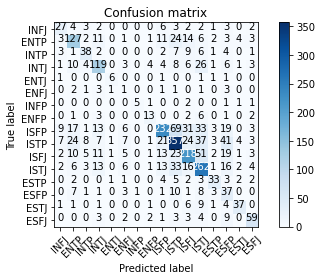

In [9]:
# ploted after Centroids Model
cnf = confusion_matrix(test_target, prediction)
#print(cnf)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = df['type'].unique())

#### Model: 16-NN
Load packages

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Fit Model and determine Accuracy

In [12]:
for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(train, train_target)
    prediction = knn.predict(test)
    print(f"K: {k} \nAccuracy: {round(accuracy_score(test_target, prediction), 4)} \n ")

K: 1 
Accuracy: 0.2374 
 
K: 2 
Accuracy: 0.2416 
 
K: 3 
Accuracy: 0.239 
 
K: 4 
Accuracy: 0.2601 
 
K: 5 
Accuracy: 0.2847 
 
K: 6 
Accuracy: 0.295 
 
K: 7 
Accuracy: 0.305 
 
K: 8 
Accuracy: 0.3081 
 
K: 9 
Accuracy: 0.3039 
 
K: 10 
Accuracy: 0.3166 
 
K: 11 
Accuracy: 0.3131 
 
K: 12 
Accuracy: 0.3146 
 
K: 13 
Accuracy: 0.3146 
 
K: 14 
Accuracy: 0.3131 
 
K: 15 
Accuracy: 0.3212 
 
K: 16 
Accuracy: 0.3196 
 
K: 17 
Accuracy: 0.3177 
 
K: 18 
Accuracy: 0.3319 
 
K: 19 
Accuracy: 0.3281 
 


In [13]:
for k in range(20,101,20):
    knn = KNeighborsClassifier(k)
    knn.fit(train, train_target)
    prediction = knn.predict(test)
    print(f"K: {k} Accuracy: {round(accuracy_score(test_target, prediction), 4)} \n ")

K: 20 Accuracy: 0.3269 
 
K: 40 Accuracy: 0.34 
 
K: 60 Accuracy: 0.3504 
 
K: 80 Accuracy: 0.3531 
 
K: 100 Accuracy: 0.355 
 


In [26]:
for k in range(120,401,40):
    knn = KNeighborsClassifier(k)
    knn.fit(train, train_target)
    prediction = knn.predict(test)
    print(f"K: {k} Accuracy: {round(accuracy_score(test_target, prediction), 4)} \n ")

K: 120 Accuracy: 0.3561 
 
K: 160 Accuracy: 0.3504 
 
K: 200 Accuracy: 0.3454 
 
K: 240 Accuracy: 0.3481 
 
K: 280 Accuracy: 0.3388 
 
K: 320 Accuracy: 0.3358 
 
K: 360 Accuracy: 0.3289 
 
K: 400 Accuracy: 0.3289 
 


Classification Report k=12:
              precision    recall  f1-score   support

        INFJ       0.29      0.15      0.19        55
        ENTP       0.33      0.15      0.21       212
        INTP       1.00      0.09      0.17        74
        INTJ       0.39      0.10      0.16       196
        ENTJ       0.56      0.45      0.50        11
        ENFJ       0.00      0.00      0.00        14
        INFP       1.00      0.18      0.31        11
        ENFP       0.60      0.11      0.18        28
        ISFP       0.25      0.72      0.37       436
        ISTP       0.33      0.49      0.39       545
        ISFJ       0.48      0.15      0.23       365
        ISTJ       0.45      0.21      0.28       378
        ESTP       0.75      0.16      0.26        58
        ESFP       0.50      0.07      0.12        73
        ESTJ       0.75      0.10      0.17        61
        ESFJ       0.78      0.08      0.15        86

    accuracy                           0.31      260

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


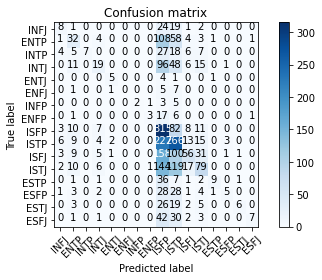

Classification Report k=18:
              precision    recall  f1-score   support

        INFJ       0.38      0.09      0.15        55
        ENTP       0.51      0.13      0.21       212
        INTP       1.00      0.08      0.15        74
        INTJ       0.45      0.09      0.15       196
        ENTJ       0.50      0.36      0.42        11
        ENFJ       0.00      0.00      0.00        14
        INFP       0.00      0.00      0.00        11
        ENFP       0.75      0.11      0.19        28
        ISFP       0.26      0.74      0.39       436
        ISTP       0.34      0.57      0.43       545
        ISFJ       0.49      0.15      0.23       365
        ISTJ       0.47      0.22      0.30       378
        ESTP       0.67      0.10      0.18        58
        ESFP       0.50      0.07      0.12        73
        ESTJ       0.62      0.08      0.14        61
        ESFJ       0.90      0.10      0.19        86

    accuracy                           0.33      260

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


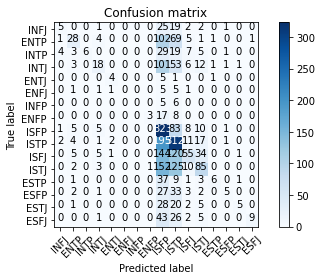

Classification Report k=120:
              precision    recall  f1-score   support

        INFJ       0.00      0.00      0.00        55
        ENTP       0.79      0.07      0.13       212
        INTP       1.00      0.03      0.05        74
        INTJ       0.77      0.05      0.10       196
        ENTJ       0.00      0.00      0.00        11
        ENFJ       0.00      0.00      0.00        14
        INFP       0.00      0.00      0.00        11
        ENFP       0.00      0.00      0.00        28
        ISFP       0.31      0.66      0.42       436
        ISTP       0.33      0.87      0.47       545
        ISFJ       0.80      0.16      0.26       365
        ISTJ       0.72      0.20      0.31       378
        ESTP       1.00      0.02      0.03        58
        ESFP       0.00      0.00      0.00        73
        ESTJ       0.67      0.03      0.06        61
        ESFJ       0.83      0.06      0.11        86

    accuracy                           0.36      26

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


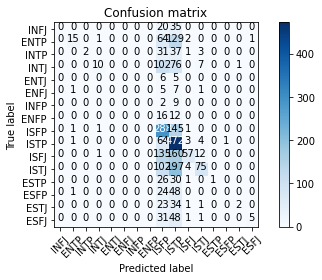

In [34]:
k_best_local_accuracy = [12, 18, 120]

for k in k_best_local_accuracy:
    knn = KNeighborsClassifier(k)
    knn.fit(train, train_target)
    prediction = knn.predict(test)
    print(f"Classification Report k={k}:")
    print(classification_report(test_target, prediction, target_names=df['type'].unique()))
    cnf = confusion_matrix(test_target, prediction)
    np.set_printoptions(precision = 2)
    plot_confusion_matrix(cnf, classes = df['type'].unique()) 

plot-confusion-matrix function from class

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()